Exercise 2: Bayesian A/B testing for Swedish Fish Incorporated with Stan 
============ 
Swedish Fish Incorporated is the largest Swedish company delivering fish by mail order, but you probably already knew that. The marketing department have done a pilot study and tried two different marketing methods:

**A:** Sending a mail with a colorful brochure that invites people to sign up for a one year salmon subscription.

**B:** Sending a colorful brochure that invites people to sign up for a one year salmon subscription *and that includes a free salmon*.

The marketing department sent out 16 mails of type A and 16 mails of type B. Six Danes that received a mail of type A signed up for one year of salmon, and ten Danes that received a mail of type B signed up!

The marketing department now wants to know, which method should we use, A or B?


## STAN Practice

In [7]:
import pystan # install with pip install pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [8]:
# The Stan model as a string.
model_string = """
# Here we define the data we are going to pass into the model
data {
  int n; # Number of trials
  int s;  # Number of successes
}

# Here we define what 'unknowns' aka parameters we have.
parameters {
  real<lower=0, upper=1> rate;
}

# The generative model
model {
  rate ~ uniform(0, 1);
  s ~ binomial(n, rate);
}

# In the generated quantiles block you can calculate 'derivatives' of
# the parameters. Here is a silly example calculating the square of the 
# rate. Variables have to be defined before they are assigned to.
generated quantities {
  real rate_squared;
  rate_squared <- rate^2;
}
"""

data_list = dict(n = 16, s = 6)

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)



INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5120beba144ab565061ba9d42b2e912b NOW.
/Users/hobart/envs/pyp/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/8h/c_dhyvjs2c9_h30gg2cl6l2c0000gn/T/tmpr31x0q84/stanfit4anon_model_5120beba144ab565061ba9d42b2e912b_597190312766586730.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [9]:
# Plotting and summarizing the posterior distribution
print(stan_samples)

Inference for Stan model: anon_model_5120beba144ab565061ba9d42b2e912b.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
rate           0.38  2.7e-3   0.11   0.18   0.31   0.38   0.45   0.61   1690    1.0
rate_squared   0.16  2.1e-3   0.09   0.03    0.1   0.15   0.21   0.37   1696    1.0
lp__         -12.53    0.02   0.73 -14.62 -12.67 -12.24 -12.07 -12.03   1546    1.0

Samples were drawn using NUTS at Sun Nov  4 16:16:05 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Figure(720x576)


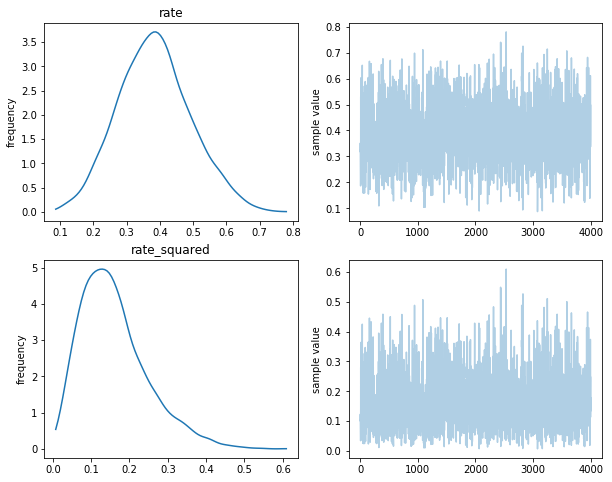

In [11]:
print(stan_samples.plot())

## Question 1: Build a Bayesian model in Stan that answers the question: What is the probability that method B is better than method A?

In [12]:
# The Stan model as a string.
model_string = """
data {
  # Number of trials
  int nA;
  int nB;
  # Number of successes
  int sA;
  int sB;
}

parameters {
  real<lower=0, upper=1> rateA;
  real<lower=0, upper=1> rateB;
}

model {
  rateA ~ uniform(0, 1);
  rateB ~ uniform(0, 1);
  sA ~ binomial(nA, rateA);
  sB ~ binomial(nB, rateB); 
}

generated quantities {
  real rate_diff;
  rate_diff <- rateB - rateA;
}
"""

data_list = dict(nA = 16, nB = 16, sA = 6, sB = 10)

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_528490c7c02220dbc5a4da271dc455d4 NOW.
/Users/hobart/envs/pyp/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/8h/c_dhyvjs2c9_h30gg2cl6l2c0000gn/T/tmp940nzfu7/stanfit4anon_model_528490c7c02220dbc5a4da271dc455d4_1134497810157939541.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [13]:
print(stan_samples)

Inference for Stan model: anon_model_528490c7c02220dbc5a4da271dc455d4.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
rateA       0.39  1.8e-3   0.11   0.18   0.31   0.38   0.46   0.61   3732    1.0
rateB       0.61  1.9e-3   0.11   0.38   0.53   0.62   0.69   0.82   3556    1.0
rate_diff   0.22  2.6e-3   0.16  -0.09   0.12   0.23   0.33   0.51   3748    1.0
lp__      -25.09    0.02   1.02 -27.76  -25.5 -24.78 -24.36 -24.09   1703    1.0

Samples were drawn using NUTS at Sun Nov  4 16:21:02 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Figure(720x576)


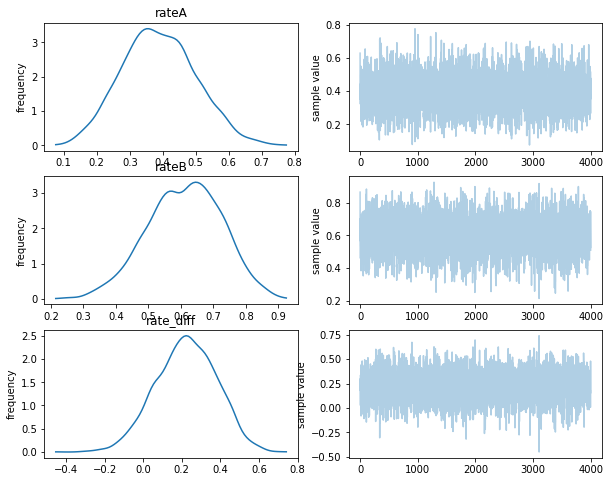

In [14]:
print(stan_samples.plot())

## Question 2: Change the model so that it uses a more informative prior. What is now the probability that method B is better than method A?
The marketing department are starting to believe that it was a fluke that such a large proportion of the Danes signed up. In all other European markets the proportion that signs up for a year of salmon is around 5% to 15%, even when given a free salmon. Use this information and make the priors in your model more informative

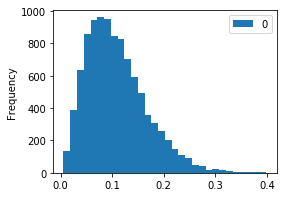

In [16]:
pd.DataFrame(np.random.beta(3, 25, size = 9999)).plot(kind = 'hist', bins = 30, figsize=(4, 3))

In [17]:
# The Stan model as a string.
model_string = """
data {
  # Number of trials
  int nA;
  int nB;
  # Number of successes
  int sA;
  int sB;
}

parameters {
  real<lower=0, upper=1> rateA;
  real<lower=0, upper=1> rateB;
}

model {  
  rateA ~ beta(3, 25);
  rateB ~ beta(3, 25);
  sA ~ binomial(nA, rateA);
  sB ~ binomial(nB, rateB); 
}

generated quantities {
  real rate_diff;
  rate_diff <- rateB - rateA;
}
"""

data_list = dict(nA = 16, nB = 16, sA = 6, sB = 10)

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ac27ec68f8d20d39adb9d18118907ef6 NOW.
/Users/hobart/envs/pyp/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/8h/c_dhyvjs2c9_h30gg2cl6l2c0000gn/T/tmpk94ycag9/stanfit4anon_model_ac27ec68f8d20d39adb9d18118907ef6_7668891602378032036.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [18]:
print(stan_samples)

Inference for Stan model: anon_model_ac27ec68f8d20d39adb9d18118907ef6.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
rateA        0.2  1.0e-3   0.06    0.1   0.16    0.2   0.24   0.33   3580    1.0
rateB        0.3  1.3e-3   0.07   0.17   0.25   0.29   0.34   0.43   2961    1.0
rate_diff   0.09  1.6e-3   0.09  -0.08   0.03   0.09   0.16   0.27   3334    1.0
lp__      -50.02    0.02   1.02 -52.73 -50.43 -49.69 -49.31 -49.02   1715    1.0

Samples were drawn using NUTS at Sun Nov  4 16:24:49 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Figure(720x576)


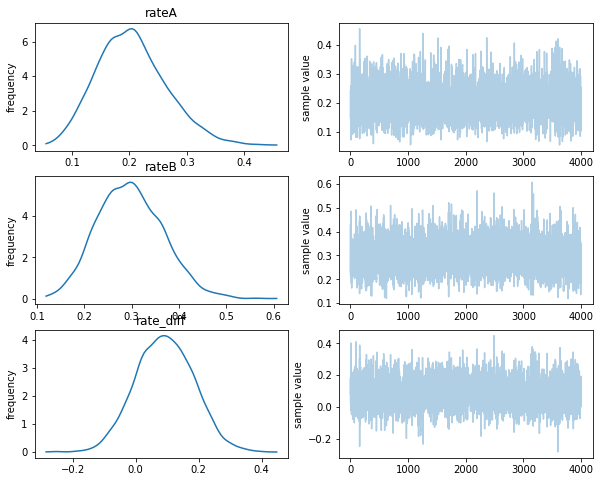

In [19]:
print(stan_samples.plot()) # The Stan model as a string.

## Question 3: So what should we do? Make a simple decision analysis.

The economy department gives you the following information:

* A mail of type A costs 30 kr to send out.
* A mail of type B costs 300 kr to send out (due to the cost of the free salmon).
* A salmon subscription brings in 1000 kr in revenue. 

**Which method, A or B, is most likely to make Swedish Fish Incorporated the most money?**

In [22]:
posterior = pd.DataFrame(stan_samples.extract())
posterior.head()

,rateA,rateB,rate_diff,lp__
0,0.227406,0.202280,-0.025126,-50.140477
1,0.126210,0.197336,0.071127,-51.261716
2,0.134319,0.301341,0.167023,-49.826237
3,0.182134,0.340057,0.157922,-49.270097
4,0.196151,0.360458,0.164306,-49.423895


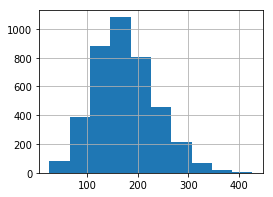

In [24]:
# calculating the estimated posterior profit using method A (or B)
# a cost of 30 kr + the average profit per sent out add

profitA = -30 + posterior.rateA * 1000 
profitB = -300 + posterior.rateB * 1000 
profitA.hist(figsize=(4, 3))

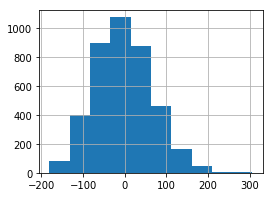

In [25]:
profitB.hist(figsize=(4,3))

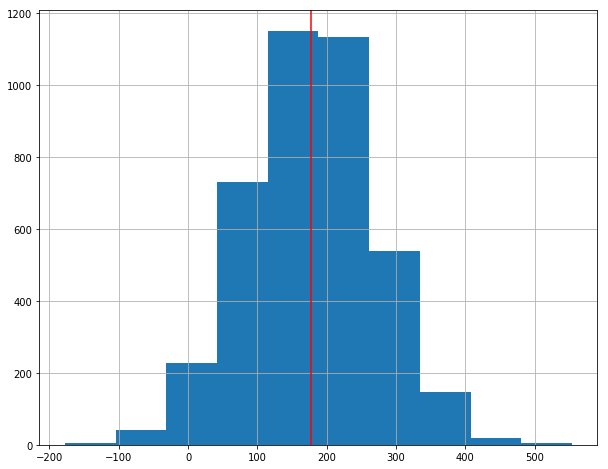

In [28]:
ax = (profitA - profitB).hist()
expected_profit_diff = np.mean(profitA - profitB)
ax.axvline(expected_profit_diff, color='r', linestyle='-')

The expected profit when using method A is around 190 kr higher than for method B (which actually has a negative expected profit). So I guess sending free salmon to people isn't the best idea… 